# Previsão de renda

### 4 elementos importantes
- Esse notebook
- Streamlit com as análises
- Seu Github com o projeto
- Vídeo no readme do github mostrando o streamlit

## Etapa 1 CRISP - DM: Entendimento do negócio

Os scores de crédito são um método comum de controle de risco no setor financeiro. Ele usa informações e dados pessoais enviados por solicitantes de cartão de crédito para prever a probabilidade de inadimplências futuras e empréstimos de cartão de crédito. A instituição financeira pode então decidir se deve ou não emitir um cartão de crédito para o solicitante. As pontuações de crédito podem quantificar objetivamente a magnitude do risco.
 
Atualmente, com o desenvolvimento de algoritmos de aprendizado de máquina, métodos mais preditivos, como Boosting, Random Forest e Support Vector Machines, foram introduzidos nos scores de crédito. No entanto, esses métodos geralmente não têm boa transparência. Pode ser difícil fornecer aos clientes e reguladores um motivo para rejeição ou aceitação.

#### Objetivo

O objetivo da modelagem é classificar o risco de inadimplência, ou como se diz no meio, o risco de default. Para efeitos deste estudo, um cliente em default é aquele que está em 60 dias de atraso ou mais. Então classificaremos os clientes como 'bons' e 'maus' assim:

###### Maus pagadores:
São aqueles que entraram em 'default' (atraso 60 dias ou mais) nos 24 meses seguintes à aquisição do cartão de crédito.

###### Bons pagadores: 
São considerados todos os demais.

###### Excluídos: 
Clientes que não adquiriram um cartão de crédito (seja por recusa, seja por desistência) não possuem informações de pagamento, portanto não se pode identificar se são bons ou maus. Há uma longa discussão e literatura sobre inferência de rejeitados que está fora do escopo deste exercício.

Desse modo, a instituição financeira poderá conhecer melhor o perfil de renda de seus novos clientes para diversos fins, por exemplo, melhor dimensionar o limite de cartões de crédito dos novos clientes, sem necessariamente solicitar olerites ou documentações que impactem na experiência do seu cliente.

## Etapa 2 Crisp-DM: Entendimento dos dados

Visando conhecer o risco default de seus clientes, a instituição financeira conduziu um estudo com alguns clientes, comprovando suas rendas através de olerites e outros documentos, além de algumas informações cadastrais tomadas como variáveis que já existentes em seu banco de dados.

### Dicionário de dados


| Variável                | Descrição                                            | Tipo         |
| ----------------------- |:----------------------------------------------------:| ------------:|
| data_ref                |  Data de referência de coleta das variáveis          | object       |
| id_cliente              |  Código de identificação do cliente                  | int64        |
| sexo                    |  Sexo do cliente                                     | object       |
| posse_de_veiculo        |  Indica se o cliente possui veículo                  | bool         |
| posse_de_imovel         |  Indica se o cliente possui imóvel                   | bool         |
| qtd_filhos              |  Quantidade de filhos do cliente                     | int64        |
| tipo_renda              |  Tipo de renda do cliente                            | object       |
| educacao                |  Grau de instrução do cliente                        | object       |
| estado_civil            |  Estado civil do cliente                             | object       |
| tipo_residencia         |  Tipo de residência do cliente (própria, alugada,etc)| object       |
| idade                   |  Idade do cliente                                    | int64        |
| tempo_emprego           |  Tempo no emprego atual                              | float64      |
| qt_pessoas_residencia   |  Quantidade de pessoas que moram na residência       | float64      |
| renda                   |   Renda em reais                                     | float64      |





#### Carregando os pacotes
É considerado uma boa prática carregar os pacotes que serão utilizados como a primeira coisa do programa.

<span style="color:red">ESCREVER AQUI</span>


In [68]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings('ignore')

#### Carregando os dados
O comando pd.read_csv é um comando da biblioteca pandas (pd.) e carrega os dados do arquivo csv indicado para um objeto *dataframe* do pandas.

<span style="color:red">ESCREVER AQUI</span>


In [69]:
df = pd.read_csv('./input/previsao_de_renda.csv')

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15000 non-null  int64  
 1   data_ref               15000 non-null  object 
 2   id_cliente             15000 non-null  int64  
 3   sexo                   15000 non-null  object 
 4   posse_de_veiculo       15000 non-null  bool   
 5   posse_de_imovel        15000 non-null  bool   
 6   qtd_filhos             15000 non-null  int64  
 7   tipo_renda             15000 non-null  object 
 8   educacao               15000 non-null  object 
 9   estado_civil           15000 non-null  object 
 10  tipo_residencia        15000 non-null  object 
 11  idade                  15000 non-null  int64  
 12  tempo_emprego          12427 non-null  float64
 13  qt_pessoas_residencia  15000 non-null  float64
 14  renda                  15000 non-null  float64
dtypes:

In [71]:
# METADADOS DA BASE
metadados = pd.DataFrame(df.nunique()).reset_index()
metadados.columns=['variaveis','qtd_categorias']
tp = []
tp = list(df.dtypes)
metadados['tipo_dados'] = tp
metadados.set_index('variaveis')

,qtd_categorias,tipo_dados
variaveis,,
Unnamed: 0,15000,int64
data_ref,15,object
id_cliente,9845,int64
sexo,2,object
posse_de_veiculo,2,bool
posse_de_imovel,2,bool
qtd_filhos,8,int64
tipo_renda,5,object
educacao,5,object


#### Entendimento dos dados - Univariada
Nesta etapa tipicamente avaliamos a distribuição de todas as variáveis. 

In [72]:
prof = ProfileReport(df, explorative=True, minimal=True)
prof


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [73]:
prof.to_file('./output/renda_analisys.html')

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

<span style="color:red">ESCREVER AQUI</span>


### Entendimento dos dados - Bivariadas



<span style="color:red">ESCREVER AQUI</span>


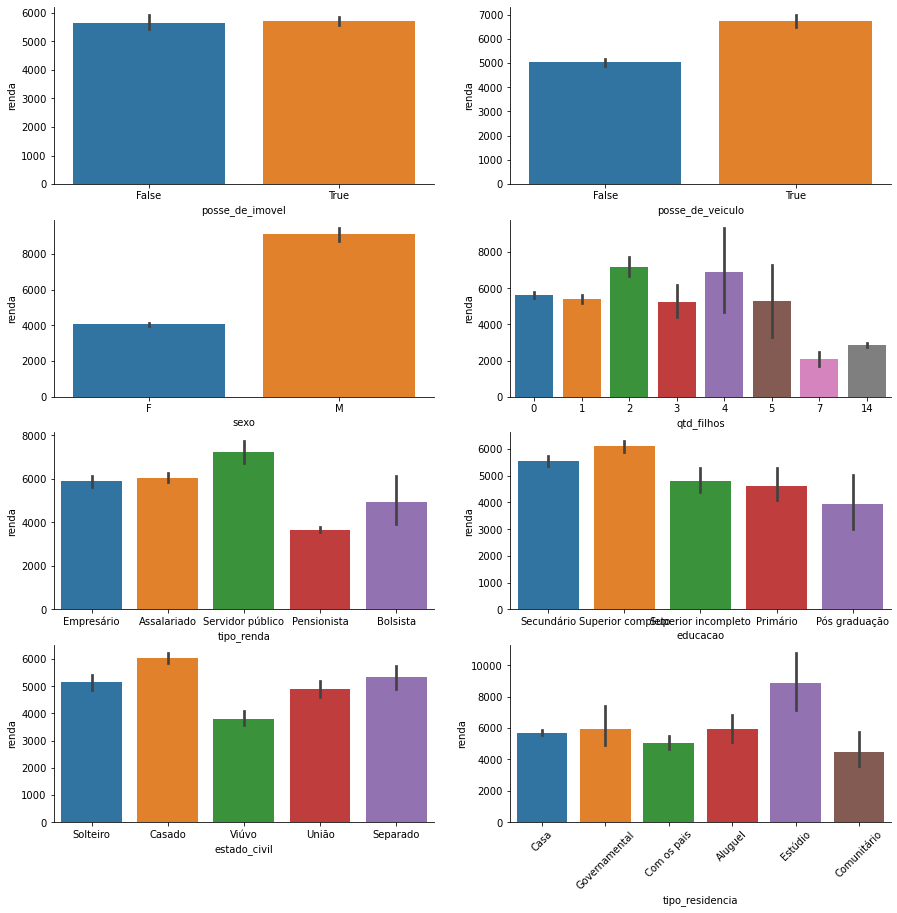

In [74]:
plt.close('all')
plt.rc('figure', figsize=(15, 15))
fig, axes = plt.subplots(4, 2)


sns.barplot(x='posse_de_imovel',y='renda',data=df, ax=axes[0,0])
sns.barplot(x='posse_de_veiculo',y='renda',data=df, ax=axes[0,1])
sns.barplot(x='qtd_filhos',y='renda',data=df, ax=axes[1,1])
sns.barplot(x='sexo',y='renda',data=df, ax=axes[1,0])
sns.barplot(x='tipo_renda',y='renda',data=df, ax=axes[2,0])
sns.barplot(x='educacao',y='renda',data=df, ax=axes[2,1])
sns.barplot(x='estado_civil',y='renda',data=df, ax=axes[3,0]) 
sns.barplot(x='tipo_residencia',y='renda',data=df, ax=axes[3,1])
plt.xticks(rotation=45)
sns.despine()


## Etapa 3 Crisp-DM: Preparação dos dados
Nessa etapa realizamos tipicamente as seguintes operações com os dados:

 - **seleção**: Já temos os dados selecionados adequadamente?
 - **limpeza**: Precisaremos identificar e tratar dados faltantes
 - **construção**: construção de novas variáveis
 - **integração**: Temos apenas uma fonte de dados, não é necessário integração
 - **formatação**: Os dados já se encontram em formatos úteis?



<span style="color:red">ESCREVER AQUI</span>
#### Limpeza dos dados: Remoção de duplicados e ausentes


In [75]:
df.dropna(subset=['tempo_emprego'],inplace=True)
df.drop_duplicates()
df.reset_index(drop=True, inplace=True)
print("\n")
df.drop(['Unnamed: 0','id_cliente'],axis = 1,inplace=True)
print("\nAPÓS TRATAMENTO DE DADOS DUPLICADOS E AUSENTES")
df.info()




APÓS TRATAMENTO DE DADOS DUPLICADOS E AUSENTES
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12427 entries, 0 to 12426
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   data_ref               12427 non-null  object 
 1   sexo                   12427 non-null  object 
 2   posse_de_veiculo       12427 non-null  bool   
 3   posse_de_imovel        12427 non-null  bool   
 4   qtd_filhos             12427 non-null  int64  
 5   tipo_renda             12427 non-null  object 
 6   educacao               12427 non-null  object 
 7   estado_civil           12427 non-null  object 
 8   tipo_residencia        12427 non-null  object 
 9   idade                  12427 non-null  int64  
 10  tempo_emprego          12427 non-null  float64
 11  qt_pessoas_residencia  12427 non-null  float64
 12  renda                  12427 non-null  float64
dtypes: bool(2), float64(3), int64(2), object(6)
memory usage

#### Tratamento de outliers

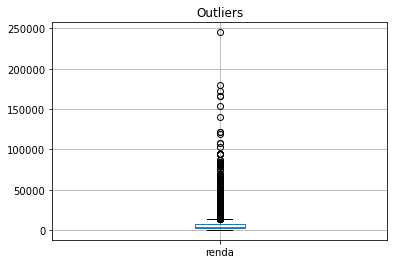

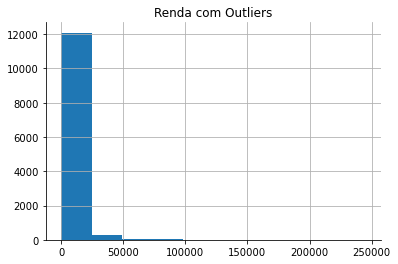

In [76]:
plt.close('all')
plt.rc('figure', figsize=(6, 4))
df.boxplot(['renda'])
plt.title('Outliers')
df.hist(['renda'])
plt.title('Renda com Outliers')
sns.despine()

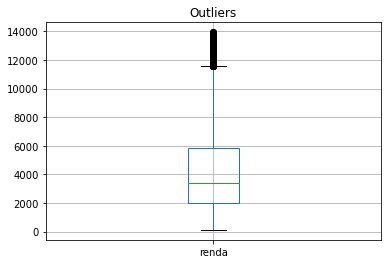

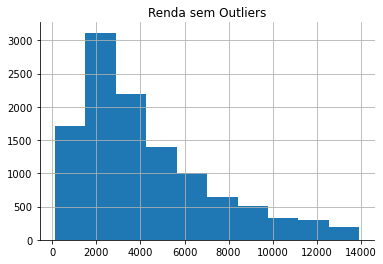

In [61]:
valor = df['renda']
Q1 = valor.quantile(.25)
Q3 = valor.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ

selecao = (valor>= limite_inferior) & (valor <= limite_superior)
renda = df[selecao]
renda.boxplot(['renda'])
plt.title('Outliers')
renda.hist(['renda'])
plt.title('Renda sem Outliers')
sns.despine()

## Etapa 4 Crisp-DM: Modelagem
Nessa etapa que realizaremos a construção do modelo. Os passos típicos são:
- Selecionar a técnica de modelagem
- Desenho do teste
- Avaliação do modelo


<span style="color:red">ESCREVER AQUI</span>


In [81]:
renda.info()
renda.to_csv('./output/renda.csv',index=False)    
renda.drop(['data_ref'],axis = 1,inplace=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11395 entries, 0 to 12426
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   data_ref               11395 non-null  object 
 1   sexo                   11395 non-null  object 
 2   posse_de_veiculo       11395 non-null  bool   
 3   posse_de_imovel        11395 non-null  bool   
 4   qtd_filhos             11395 non-null  int64  
 5   tipo_renda             11395 non-null  object 
 6   educacao               11395 non-null  object 
 7   estado_civil           11395 non-null  object 
 8   tipo_residencia        11395 non-null  object 
 9   idade                  11395 non-null  int64  
 10  tempo_emprego          11395 non-null  float64
 11  qt_pessoas_residencia  11395 non-null  float64
 12  renda                  11395 non-null  float64
dtypes: bool(2), float64(3), int64(2), object(6)
memory usage: 1.1+ MB


In [82]:
# SEPARAÇÃO DE BASES EM 25% PARA TESTE E 75% PARA TREINAMENTO

train, test = train_test_split(renda, test_size=0.25, random_state=2360873)
print("Base Treino")
print(train.shape)
print("\nBase Teste")
print(test.shape)
test.head(2)

Base Treino
(8546, 12)

Base Teste
(2849, 12)


,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
4870,F,False,True,0,Assalariado,Secundário,Solteiro,Casa,48,21.030137,1.0,5409.36
10724,F,False,True,2,Assalariado,Secundário,Separado,Casa,37,8.241096,3.0,6731.42


In [83]:
# CRIANDO A MATRIZ DE DESIGN
y, X = patsy.dmatrices('renda ~ posse_de_veiculo +posse_de_imovel +qtd_filhos +tipo_renda +educacao +estado_civil +tipo_residencia +idade +tempo_emprego +qt_pessoas_residencia', test)
modelo = sm.OLS(y,X).fit()
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.115
Model:                            OLS   Adj. R-squared:                  0.107
Method:                 Least Squares   F-statistic:                     15.90
Date:                Mon, 01 Aug 2022   Prob (F-statistic):           3.17e-59
Time:                        17:55:28   Log-Likelihood:                -26679.
No. Observations:                2849   AIC:                         5.341e+04
Df Residuals:                    2825   BIC:                         5.355e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                         1744.3610   1851.775      0.942      0.346   -1886.606    5375.328
posse_de_veiculo[T.True]           757.4689    111.640      6.785      0.000     538.564     976.374
posse_de_imovel[T.True]            108.2711    114.833      0.943      0.346    -116.894     333.436
tipo_renda[T.Bolsista]            -148.2583   1642.671     -0.090      0.928   -3369.213    3072.697
tipo_renda[T.Empresário]           373.1950    121.584      3.069      0.002     134.793     611.597
tipo_renda[T.Pensionista]        -1260.9334   1274.663     -0.989      0.323   -3760.298    1238.432
tipo_renda[T.Servidor público]     284.1636    194.371      1.462      0.144     -96.960     665.287
educacao[T.Pós graduação]         1930.0478   1516.279      1.273      0.203   -1043.079    4903.175
educacao[T.Secundário]             162.9587    537.565      0.303      0.762    -891.101    1217.018
educacao[T.Superior completo]      122.3348    538.993      0.227      0.820    -934.524    1179.194
educacao[T.Superior incompleto]   -172.4334    586.727     -0.294      0.769   -1322.889     978.022
estado_civil[T.Separado]           454.6648    886.435      0.513      0.608   -1283.460    2192.789
estado_civil[T.Solteiro]           891.1406    867.702      1.027      0.305    -810.253    2592.534
estado_civil[T.União]             -586.5659    199.098     -2.946      0.003    -976.957    -196.175
estado_civil[T.Viúvo]              908.6620    917.511      0.990      0.322    -890.398    2707.722
tipo_residencia[T.Casa]          -1140.6084    407.716     -2.798      0.005   -1940.059    -341.158
tipo_residencia[T.Com os pais]   -1284.4084    465.032     -2.762      0.006   -2196.244    -372.572
tipo_residencia[T.Comunitário]    -533.4046    757.515     -0.704      0.481   -2018.743     951.934
tipo_residencia[T.Estúdio]       -1680.4310    861.420     -1.951      0.051   -3369.507       8.645
tipo_residencia[T.Governamental] -1273.3495    524.104     -2.430      0.015   -2301.014    -245.685
qtd_filhos                        -785.1050    857.314     -0.916      0.360   -2466.129     895.919
idade                                3.9147      6.550      0.598      0.550      -8.929      16.759
tempo_emprego                      151.1588      9.260     16.325      0.000     133.003     169.315
qt_pessoas_residencia              903.5809    856.614      1.055      0.292    -776.072    2583.234
==============================================================================
Omnibus:                      414.234   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              615.858
Skew:                           1.063   Prob(JB):                    1.85e-134
Kurtosis:                       3.819   

In [84]:
# RODANDO STEPWISE PARA SELEÇÃO DE VARIÁVEIS DO MODELO
X = test.copy()
X.drop(['renda'],axis = 1,inplace=True)
X.sexo = X.sexo.map({'F': 1, 'M':0})
X = pd.get_dummies(X, columns=['posse_de_veiculo','educacao','posse_de_imovel','tipo_renda','estado_civil','tipo_residencia'], drop_first=True)
print(X.shape)
y=np.array(test['renda'].values)
print(y.shape)
np.sort(y)

(2849, 24)
(2849,)


array([  300.76,   300.76,   327.51, ..., 13824.73, 13847.06, 13863.35])

In [85]:
def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded, dtype=np.dtype('float64'))
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.index[new_pval.argmin()]
            included.append(best_feature)
            changed=True
            if verbose:
                 print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        print("-"*60)
        print(included)
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

variaveis = stepwise_selection(X, y)

print('\nresulting features:')
print(variaveis)

Add  sexo                           with p-value 1.06929e-57
------------------------------------------------------------
['sexo']
Add  tempo_emprego                  with p-value 2.70677e-94
------------------------------------------------------------
['sexo', 'tempo_emprego']
Add  tipo_renda_Empresário          with p-value 0.000201025
------------------------------------------------------------
['sexo', 'tempo_emprego', 'tipo_renda_Empresário']
Add  estado_civil_União             with p-value 0.00174504
------------------------------------------------------------
['sexo', 'tempo_emprego', 'tipo_renda_Empresário', 'estado_civil_União']
Add  tipo_renda_Servidor público    with p-value 0.00294572
------------------------------------------------------------
['sexo', 'tempo_emprego', 'tipo_renda_Empresário', 'estado_civil_União', 'tipo_renda_Servidor público']
------------------------------------------------------------
['sexo', 'tempo_emprego', 'tipo_renda_Empresário', 'estado_civil_Uni

### Rodando o modelo


<span style="color:red">ESCREVER AQUI</span>


In [86]:
reg_stepwise = sm.OLS(y, sm.add_constant(pd.DataFrame(X[variaveis]))).fit()
reg_stepwise.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.222
Model:                            OLS   Adj. R-squared:                  0.220
Method:                 Least Squares   F-statistic:                     161.9
Date:                Mon, 01 Aug 2022   Prob (F-statistic):          8.07e-152
Time:                        17:55:45   Log-Likelihood:                -26495.
No. Observations:                2849   AIC:                         5.300e+04
Df Residuals:                    2843   BIC:                         5.304e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                        4465.6447    104.573     42.704      0.000    4260.599    4670.691
sexo                        -2361.7695    108.176    -21.833      0.000   -2573.882   -2149.657
tempo_emprego                 178.0589      8.386     21.234      0.000     161.616     194.502
tipo_renda_Empresário         481.8144    112.371      4.288      0.000     261.478     702.151
estado_civil_União           -581.8920    181.957     -3.198      0.001    -938.673    -225.111
tipo_renda_Servidor público   536.1737    180.171      2.976      0.003     182.895     889.452
==============================================================================
Omnibus:                      385.178   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              565.219
Skew:                           0.994   Prob(JB):                    1.84e-123
Kurtosis:                       3.901   Cond. No.                         34.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [87]:
L1=pd.DataFrame(X[variaveis])
L1.rename(columns={'tipo_renda_Empresário': 'tipo_renda_empresario',
                   'estado_civil_União': 'estado_civil',
                   'tipo_renda_Servidor público': 'tipo_renda_servidor'}
          , inplace = True)
L1['renda'] = y.tolist()
L1

,sexo,tempo_emprego,tipo_renda_empresario,estado_civil,tipo_renda_servidor,renda
4870,1,21.030137,0,0,0,5409.36
10724,1,8.241096,0,0,0,6731.42
6215,1,3.386301,1,0,0,2184.97
7280,1,3.326027,0,0,0,2602.40
5906,1,1.369863,0,0,0,1286.11
...,...,...,...,...,...,...
5630,1,18.632877,0,1,0,9748.94
11978,0,6.164384,0,0,0,664.13
7169,1,15.942466,0,0,1,8374.47
878,0,9.627397,0,0,0,8651.81


In [88]:
# UTILIZAÇÃO DA REGULARIZAÇÃO LASSO COM ALPHA = 0 e log(renda)

a = float(input('Informe o alpha desejado para a regularização Lasso: '))
modelo = 'np.log(renda) ~ sexo + posse_de_veiculo + posse_de_imovel + qtd_filhos + tipo_renda + educacao + estado_civil + tipo_residencia + idade + tempo_emprego + qt_pessoas_residencia'
# modelo = 'renda ~ sexo + tempo_emprego + tipo_renda_empresario + estado_civil + tipo_renda_servidor'
md_lasso = smf.ols(modelo, data = test)
reg_lasso = md_lasso.fit_regularized(method = 'elastic_net' 
                         , refit = True
                         , L1_wt = 1
                         , alpha = a)

reg_lasso.summary()

Informe o alpha desejado para a regularização Lasso: 0


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.226
Model:                            OLS   Adj. R-squared:                  0.219
Method:                 Least Squares   F-statistic:                     32.99
Date:                Mon, 01 Aug 2022   Prob (F-statistic):          3.87e-137
Time:                        17:55:56   Log-Likelihood:                -2780.8
No. Observations:                2849   AIC:                             5614.
Df Residuals:                    2824   BIC:                             5768.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                            6.5148      0.422     15.432      0.000       5.687       7.343
sexo[T.M]                            0.5848      0.028     20.686      0.000       0.529       0.640
posse_de_veiculo[T.True]             0.0397      0.027      1.488      0.137      -0.013       0.092
posse_de_imovel[T.True]              0.0425      0.026      1.627      0.104      -0.009       0.094
tipo_renda[T.Bolsista]               0.2555      0.374      0.683      0.494      -0.478       0.989
tipo_renda[T.Empresário]             0.1084      0.028      3.914      0.000       0.054       0.163
tipo_renda[T.Pensionista]           -0.1594      0.290     -0.549      0.583      -0.728       0.410
tipo_renda[T.Servidor público]       0.0945      0.044      2.133      0.033       0.008       0.181
educacao[T.Pós graduação]            0.4109      0.345      1.191      0.234      -0.266       1.088
educacao[T.Secundário]               0.0168      0.122      0.137      0.891      -0.223       0.257
educacao[T.Superior completo]        0.0595      0.123      0.485      0.628      -0.181       0.300
educacao[T.Superior incompleto]     -0.0710      0.134     -0.532      0.595      -0.333       0.191
estado_civil[T.Separado]             0.4506      0.202      2.232      0.026       0.055       0.846
estado_civil[T.Solteiro]             0.4777      0.198      2.418      0.016       0.090       0.865
estado_civil[T.União]               -0.1299      0.045     -2.867      0.004      -0.219      -0.041
estado_civil[T.Viúvo]                0.6075      0.209      2.906      0.004       0.198       1.017
tipo_residencia[T.Casa]             -0.0806      0.093     -0.867      0.386      -0.263       0.102
tipo_residencia[T.Com os pais]      -0.1137      0.106     -1.074      0.283      -0.321       0.094
tipo_residencia[T.Comunitário]      -0.0429      0.172     -0.249      0.803      -0.381       0.295
tipo_residencia[T.Estúdio]          -0.2511      0.196     -1.281      0.200      -0.636       0.133
tipo_residencia[T.Governamental]    -0.0967      0.119     -0.810      0.418      -0.331       0.137
qtd_filhos                          -0.4336      0.195     -2.222      0.026      -0.816      -0.051
idade                                0.0047      0.001      3.129      0.002       0.002       0.008
tempo_emprego                        0.0404      0.002     18.977      0.000       0.036       0.045
qt_pessoas_residencia                0.4485      0.195      2.300      0.022       0.066       0.831
==============================================================================
Omnibus:                       27.775   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.934
Skew:             

In [89]:
# UTILIZAÇÃO DA REGULARIZAÇÃO RIDGE COM ALPHA = 0 e log(renda)

a = float(input('Informe o alpha desejado para a regularização Ridge: '))
modelo = 'np.log(renda) ~ sexo + posse_de_veiculo + posse_de_imovel + qtd_filhos + tipo_renda + educacao + estado_civil + tipo_residencia + idade + tempo_emprego + qt_pessoas_residencia'
# modelo = 'renda ~ sexo + tempo_emprego + tipo_renda_empresario + estado_civil + tipo_renda_servidor'
md_lasso = smf.ols(modelo, data = test)
reg_lasso = md_lasso.fit_regularized(method = 'elastic_net' 
                         , refit = True
                         , L1_wt = 0.0000000000001
                         , alpha = a)

reg_lasso.summary()

Informe o alpha desejado para a regularização Ridge: 0


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.226
Model:                            OLS   Adj. R-squared:                  0.219
Method:                 Least Squares   F-statistic:                     32.99
Date:                Mon, 01 Aug 2022   Prob (F-statistic):          3.87e-137
Time:                        17:56:04   Log-Likelihood:                -2780.8
No. Observations:                2849   AIC:                             5614.
Df Residuals:                    2824   BIC:                             5768.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                            6.5148      0.422     15.432      0.000       5.687       7.343
sexo[T.M]                            0.5848      0.028     20.686      0.000       0.529       0.640
posse_de_veiculo[T.True]             0.0397      0.027      1.488      0.137      -0.013       0.092
posse_de_imovel[T.True]              0.0425      0.026      1.627      0.104      -0.009       0.094
tipo_renda[T.Bolsista]               0.2555      0.374      0.683      0.494      -0.478       0.989
tipo_renda[T.Empresário]             0.1084      0.028      3.914      0.000       0.054       0.163
tipo_renda[T.Pensionista]           -0.1594      0.290     -0.549      0.583      -0.728       0.410
tipo_renda[T.Servidor público]       0.0945      0.044      2.133      0.033       0.008       0.181
educacao[T.Pós graduação]            0.4109      0.345      1.191      0.234      -0.266       1.088
educacao[T.Secundário]               0.0168      0.122      0.137      0.891      -0.223       0.257
educacao[T.Superior completo]        0.0595      0.123      0.485      0.628      -0.181       0.300
educacao[T.Superior incompleto]     -0.0710      0.134     -0.532      0.595      -0.333       0.191
estado_civil[T.Separado]             0.4506      0.202      2.232      0.026       0.055       0.846
estado_civil[T.Solteiro]             0.4777      0.198      2.418      0.016       0.090       0.865
estado_civil[T.União]               -0.1299      0.045     -2.867      0.004      -0.219      -0.041
estado_civil[T.Viúvo]                0.6075      0.209      2.906      0.004       0.198       1.017
tipo_residencia[T.Casa]             -0.0806      0.093     -0.867      0.386      -0.263       0.102
tipo_residencia[T.Com os pais]      -0.1137      0.106     -1.074      0.283      -0.321       0.094
tipo_residencia[T.Comunitário]      -0.0429      0.172     -0.249      0.803      -0.381       0.295
tipo_residencia[T.Estúdio]          -0.2511      0.196     -1.281      0.200      -0.636       0.133
tipo_residencia[T.Governamental]    -0.0967      0.119     -0.810      0.418      -0.331       0.137
qtd_filhos                          -0.4336      0.195     -2.222      0.026      -0.816      -0.051
idade                                0.0047      0.001      3.129      0.002       0.002       0.008
tempo_emprego                        0.0404      0.002     18.977      0.000       0.036       0.045
qt_pessoas_residencia                0.4485      0.195      2.300      0.022       0.066       0.831
==============================================================================
Omnibus:                       27.775   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.934
Skew:             

## Etapa 5 Crisp-DM: Avaliação dos resultados


<span style="color:red">ESCREVER AQUI</span>

#### Conclusão
A regularização stepwise obteve um resultado um pouco inferiror se comparado à regularização Lasso e Ridge, apresentando um R² de 0.222 e 0.226, respectivamente.

Por conseguinte, tanto na regularização Ridge quanto a Lasso, não foram verificadas alterações significativas no R², assim, adotamos o modelo com as variáveis sugeridas pelo método 'stepwise' por ter alcançado resultados similares com menos variáveis.

## Etapa 6 Crisp-DM: Implantação
Nessa etapa colocamos em uso o modelo desenvolvido, normalmente implementando o modelo desenvolvido em um motor que toma as decisões com algum nível de automação.